In [1]:
import os
import sys

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../../../AutexysHost/source')
    
from utilities import DataLoggerUtility as dlu
from utilities import DataPlotterUtility as dpu
mplu = dpu.mplu
from utilities import FET_Modeling as fet_model
#from procedures import Device_History as DH

import numpy as np

 === Figure S1 === 
Plotting TransferCurve plot.
Finished plotting TransferCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 1.2207601070404053)
Plotting StaticBias plot.
Finished plotting StaticBias plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.8262369632720947)
Saving figures.
Figures saved. (Seconds elapsed: 0.45908021926879883)


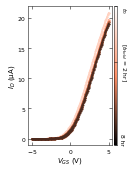

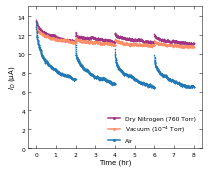

In [39]:
print(' === Figure S1 === ')

# -- Data Loading --

data_air_gs = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/34-35', 'GateSweep.json', minExperiment=48, maxExperiment=48)
data_air_sb = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/34-35', 'StaticBias.json', minExperiment=48, maxExperiment=48)

data_vacuum_gs = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/34-35', 'GateSweep.json', minExperiment=67, maxExperiment=67)
data_vacuum_sb = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/34-35', 'StaticBias.json', minExperiment=67, maxExperiment=67)

data_nitrogen_gs = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/34-35', 'GateSweep.json', minExperiment=74, maxExperiment=74)
data_nitrogen_sb = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/34-35', 'StaticBias.json', minExperiment=74, maxExperiment=74)

# -- Colors --

color_vacuum   = mplu.setupColors(None, 1, colorDefault=[], colorMapName='white_peach_black', colorMapStart=0.5, colorMapEnd=0.5)[0]
color_nitrogen = mplu.setupColors(None, 1, colorDefault=[], colorMapName='white_magenta_black', colorMapStart=0.5, colorMapEnd=0.5)[0]
color_air      = mplu.setupColors(None, 1, colorDefault=[], colorMapName='white_blue_black', colorMapStart=0.5, colorMapEnd=0.5)[0]
 

# -- Plots --

fig1, axes1 = dpu.makeDevicePlot('TransferCurve', data_vacuum_gs, data_vacuum_gs[0]['Identifiers'], mode_parameters={'publication_mode':True, 'figureSizeOverride':(2,2.5), 'enableColorBar':True, 'enableLegend':False, 'colorsOverride':('white_peach_black',0.8,0.15)})
#fig2, axes2 = dpu.makeDevicePlot('StaticBias'   , data_vacuum_sb, data_vacuum_sb[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'colorsOverride':('white_peach_black',0.8,0.15)})

fig3, axes3 = dpu.makeDevicePlot('TransferCurve', data_nitrogen_gs, data_nitrogen_gs[0]['Identifiers'], mode_parameters={'publication_mode':True, 'figureSizeOverride':(2,2.5), 'enableColorBar':True, 'enableLegend':False, 'colorsOverride':('white_magenta_black',0.8,0.15)})
#fig4, axes4 = dpu.makeDevicePlot('StaticBias'   , data_nitrogen_sb, data_nitrogen_sb[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'colorsOverride':('white_magenta_black',0.8,0.15)})

# -- Combined Plot --

fig5, axes5 = dpu.makeDevicePlot('StaticBias'   , data_nitrogen_sb, data_nitrogen_sb[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'colorsOverride':[color_nitrogen]*len(data_nitrogen_sb), 'ylim':{'top':15}, 'figureSizeOverride':(3,2.5)})
ax = axes5[0]
ax.lines[0].set_label('Dry Nitrogen (760 Torr)')

for deviceRun in data_vacuum_sb:
    deviceRun['Results']['timestamps'] = np.array(deviceRun['Results']['timestamps'])/3600
t0 = data_vacuum_sb[0]['Results']['timestamps'][0]
time_offsets = [deviceRun['Results']['timestamps'][0] - t0 for deviceRun in data_vacuum_sb]
for i in range(len(data_vacuum_sb)):
    line = mplu.plotStaticBias(ax, data_vacuum_sb[i], color_vacuum, time_offsets[i]) 
    line.set_label('Vacuum ($\\mathregular{10^{-4}}$ Torr)' if(i==0) else None)

for deviceRun in data_air_sb:
    deviceRun['Results']['timestamps'] = np.array(deviceRun['Results']['timestamps'])/3600
t0 = data_air_sb[0]['Results']['timestamps'][0]
time_offsets = [deviceRun['Results']['timestamps'][0] - t0 for deviceRun in data_air_sb]
for i in range(len(data_air_sb)):
    line = mplu.plotStaticBias(ax, data_air_sb[i], color_air, time_offsets[i])   
    line.set_label('Air' if(i==0) else None)
    
legend = ax.legend(loc="lower right", markerscale=2)
for line in legend.get_lines():
    line.set_linewidth(1.5)
    
dpu.saveExternalPlot(fig5, "Envionrment_Comparison")
    

Plotting TransferCurve plot.
Finished plotting TransferCurve plot.
Saving figures.


No handles with labels found to put in legend.


Figures saved. (Seconds elapsed: 0.2734041213989258)
Plotting BoxPlotThresholdVoltage plot.
Extracted VT: [0.397142270346951]
Finished plotting BoxPlotThresholdVoltage plot.
Saving figures.


No handles with labels found to put in legend.


Figures saved. (Seconds elapsed: 0.25411391258239746)
Plotting BoxPlotTransconductance plot.
Extracted gm: [8.960756334890617e-07]
Finished plotting BoxPlotTransconductance plot.
Saving figures.


No handles with labels found to put in legend.


Figures saved. (Seconds elapsed: 0.4686398506164551)
Plotting BoxPlotSubthresholdSwing plot.
Extracted SS_mV_dec: [943.8592507296406]
Finished plotting BoxPlotSubthresholdSwing plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.21789813041687012)
W_ch = 5 um


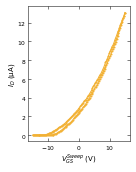

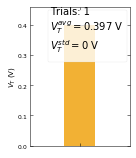

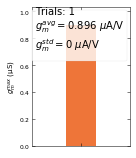

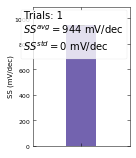

In [4]:
data_orig_D53_54 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM3/B/53-54', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=0, maxRelativeIndex=0)

figA7, axA7 = dpu.makeDevicePlot('TransferCurve', data_orig_D53_54, data_orig_D53_54[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5)})

fig7, axes7 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_orig_D53_54)  , data_orig_D53_54[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig8, axes8 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_orig_D53_54)  , data_orig_D53_54[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig9, axes9 = dpu.makeDevicePlot('BoxPlotSubthresholdSwing', (data_orig_D53_54)  , data_orig_D53_54[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})

print('W_ch = 5 um')

Plotting ChipSubthresholdCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 1.057107925415039)
Plotting SubthresholdCurve plot.
Finished plotting SubthresholdCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.9957571029663086)
Plotting BoxPlotThresholdVoltage plot.
Extracted VT: [-1.008113374796571, -1.0412086830589253, -1.8777008162517546, -1.6124683917358988, -0.6593631015506659, -1.0147619840372775]
Finished plotting BoxPlotThresholdVoltage plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.6618218421936035)
Saving figures.
Figures saved. (Seconds elapsed: 0.21275901794433594)
Plotting BoxPlotTransconductance plot.
Extracted gm: [3.4514914607654678e-06, 4.284311492460328e-06, 7.584011852163488e-06, 7.384292456780143e-06, 3.5282609767400845e-06, 4.4364494224937875e-06]
Finished plotting BoxPlotTransconductance plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.49526500701904297)
Plotting BoxPlotSubthresholdSwing plot.


No handles with labels found to put in legend.


Extracted SS_mV_dec: [340.39178726674584, 234.03147184502566, 220.67575945678394, 257.45819287331193, 308.6323516018463, 303.0221586661293]
Finished plotting BoxPlotSubthresholdSwing plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.5517628192901611)
gm normalized: [1.380596584306187e-06, 2.142155746230164e-06, 2.166860529189568e-06, 2.4614308189267142e-06, 2.3521739844933897e-06, 1.1091123556234469e-06]
gm normalized mean: 1.9353883364615785e-06
gm normalized std: 5.061766806629478e-07
Plotting StaticBias plot.
Finished plotting StaticBias plot.
Saving figures.
Figures saved. (Seconds elapsed: 1.4030747413635254)


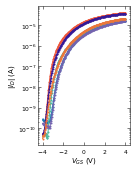

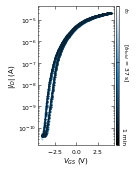

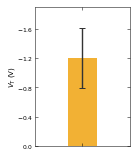

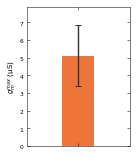

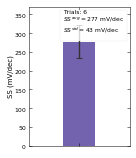

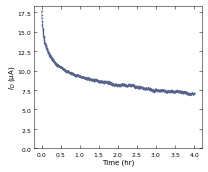

In [8]:
colors = ['#1f77b4', '#4FB99F', '#ed553b', '#351996', '#7363af', '#ee7539']

data_orig_D5_6 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/5-6', 'GateSweep.json', minExperiment=8, maxExperiment=8, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D24_25 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/24-25', 'GateSweep.json', minExperiment=33, maxExperiment=33, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D27_30 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/27-30', 'GateSweep.json', minExperiment=25, maxExperiment=25, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D28_29 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/28-29', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D31_32 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/31-32', 'GateSweep.json', minExperiment=9, maxExperiment=9, minRelativeIndex=4, maxRelativeIndex=4)
data_orig_D34_35 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/34-35', 'GateSweep.json', minExperiment=14, maxExperiment=14, minRelativeIndex=0, maxRelativeIndex=0)
data_orig = [data_orig_D5_6[0], data_orig_D24_25[0], data_orig_D27_30[0], data_orig_D28_29[0], data_orig_D31_32[0], data_orig_D34_35[0]]

data_multiple_D34_35 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/34-35', 'GateSweep.json', minExperiment=14, maxExperiment=14, minRelativeIndex=0, maxRelativeIndex=float('inf'))


fig4, ax4 = dpu.makeChipPlot('ChipSubthresholdCurve', data_orig[0]['Identifiers'], recentRunChipHistory=data_orig, specificRunChipHistory=data_orig, mode_parameters={'enableLegend':False, 'figureSizeOverride':(2,2.5), 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'colorsOverride':colors})
#fig5, ax5 = dpu.makeChipPlot('ChipTransferCurve', data_orig[0]['Identifiers'], recentRunChipHistory=data_orig, specificRunChipHistory=data_orig, mode_parameters={'enableLegend':False, 'figureSizeOverride':(1.9,2.5), 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'colorsOverride':colors})

fig6, ax6 = dpu.makeDevicePlot('SubthresholdCurve', data_multiple_D34_35, data_multiple_D34_35[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':True, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[]})

fig7, axes7 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_orig)            , data_orig[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False,  'sweepDirection':'forward', 'colorsOverride':[], 'figureSizeOverride':(2,2.3)})
axes7[0].set_ylim(top=0, bottom=-1.9)
axes7[0].invert_yaxis()
axes7[0].set_yticks([0,-0.4,-0.8,-1.2,-1.6])
dpu.saveExternalPlot(fig7, 'BoxPlotVT_editted')

fig8, axes8 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_orig)            , data_orig[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False,  'sweepDirection':'forward', 'colorsOverride':[]})
fig8, axes8 = dpu.makeDevicePlot('BoxPlotSubthresholdSwing', (data_orig)            , data_orig[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward', 'colorsOverride':[]})


gm_list = [3.4514914607654678e-06, 4.284311492460328e-06, 7.584011852163488e-06, 7.384292456780143e-06, 3.5282609767400845e-06, 4.4364494224937875e-06]
W_ch = [2.5,2,3.5,3,1.5,4]

gm_width_normalized = [gm_list[i]/W_ch[i] for i in range(len(W_ch))]
print('========')
print('gm normalized: ' + str(gm_width_normalized))
print('gm normalized mean: ' + str(np.mean(gm_width_normalized)))
print('gm normalized std: ' + str(np.std(gm_width_normalized)))

data_sb_D34_35 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/C/34-35', 'StaticBias.json', minExperiment=37, maxExperiment=37)
fig8, axes8 = dpu.makeDevicePlot('StaticBias', (data_sb_D34_35), data_sb_D34_35[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'colorsOverride':[]})



 === Figure S4 === 
Plotting TransferCurve plot.
Finished plotting TransferCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.8766558170318604)
Saving figures.
Figures saved. (Seconds elapsed: 0.6621921062469482)
Plotting ChipSubthresholdCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.7657680511474609)
Saving figures.
Figures saved. (Seconds elapsed: 0.786297082901001)
Plotting BoxPlotThresholdVoltage plot.


No handles with labels found to put in legend.


Extracted VT: [-5.143427741465224, -5.746126465844075, -5.305197276021449, -3.860689244429961, -4.105287821831774, -5.032962347410755, -4.026391864721851, -5.065972657708372, -5.1925434385298965, -4.824236946408683, -3.8819099409290074, -4.917640260127714, -4.909900386124158]
Finished plotting BoxPlotThresholdVoltage plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.5741589069366455)
Plotting BoxPlotTransconductance plot.


No handles with labels found to put in legend.


Extracted gm: [4.530694836296809e-06, 7.650799478501812e-06, 4.718572501281726e-06, 6.255194071737292e-06, 4.580258858600791e-06, 8.591417087974264e-06, 4.921986269743464e-06, 6.310725518744782e-06, 4.53839849895733e-06, 8.234989284098782e-06, 4.497913764621729e-06, 2.4294435853623086e-06, 6.3982867250592485e-06]
Finished plotting BoxPlotTransconductance plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.5777029991149902)
Plotting BoxPlotSubthresholdSwing plot.


No handles with labels found to put in legend.


Extracted SS_mV_dec: [319.0938009935748, 446.5682701215233, 303.9365980542556, 290.4441523862649, 284.8005937623627, 302.4954766517745, 333.86702468253657, 287.6547287003985, 311.1314438922763, 277.4951149121378, 314.3833676139074, 288.55845207345004, 306.9259044016044]
Finished plotting BoxPlotSubthresholdSwing plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.5241742134094238)
Plotting BoxPlotThresholdVoltage plot.
Extracted VT: [-2.676782865632752, -2.8117304235264524, -1.6613146301952517, -1.3735537705448306, -0.8593480277016383, -2.3641182079686205, -0.7800574660884831, -2.141889630572296, -1.7712215169343275, -1.526095635656514, -1.096288352403613, -2.170767302318642, -1.899456879932065, -5.143427741465224, -5.746126465844075, -5.305197276021449, -3.860689244429961, -4.105287821831774, -5.032962347410755, -4.026391864721851, -5.065972657708372, -5.1925434385298965, -4.824236946408683, -3.8819099409290074, -4.917640260127714, -4.909900386124158]
Finished plotting BoxPlotThr

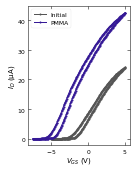

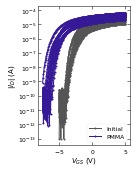

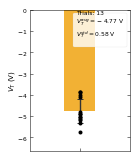

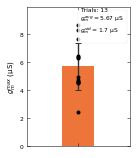

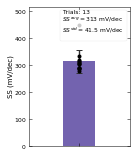

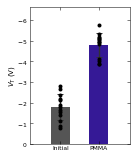

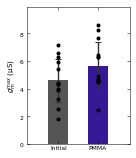

In [2]:
print(' === Figure S4 === ')

color_initial = '#555555'
color_PMMA = '#351996'

data_orig_D2_3 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/2-3', 'GateSweep.json', minExperiment=6, maxExperiment=6, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D4_5 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/4-5', 'GateSweep.json', minExperiment=6, maxExperiment=6, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D6_7 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/6-7', 'GateSweep.json', minExperiment=8, maxExperiment=8, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D14_19 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/14-19', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D28_29 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/28-29', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D30_31 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/30-31', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D34_35 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/34-35', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D36_37 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/36-37', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D40_41 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/40-41', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D43_44 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/43-44', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D47_50 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/47-50', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D48_49 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/48-49', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D62_63 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/62-63', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=0, maxRelativeIndex=0)
data_orig = [data_orig_D2_3[0], data_orig_D4_5[0], data_orig_D6_7[0], data_orig_D14_19[0], data_orig_D28_29[0], data_orig_D30_31[0], data_orig_D34_35[0], data_orig_D36_37[0], data_orig_D40_41[0], data_orig_D43_44[0], data_orig_D47_50[0], data_orig_D48_49[0], data_orig_D62_63[0]]

data_PMMA_D2_3 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/2-3', 'GateSweep.json', minExperiment=9, maxExperiment=9, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA_D4_5 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/4-5', 'GateSweep.json', minExperiment=11, maxExperiment=11, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA_D6_7 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/6-7', 'GateSweep.json', minExperiment=13, maxExperiment=13, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA_D14_19 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/14-19', 'GateSweep.json', minExperiment=5, maxExperiment=5, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA_D28_29 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/28-29', 'GateSweep.json', minExperiment=5, maxExperiment=5, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA_D30_31 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/30-31', 'GateSweep.json', minExperiment=5, maxExperiment=5, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA_D34_35 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/34-35', 'GateSweep.json', minExperiment=6, maxExperiment=6, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA_D36_37 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/36-37', 'GateSweep.json', minExperiment=5, maxExperiment=5, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA_D40_41 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/40-41', 'GateSweep.json', minExperiment=5, maxExperiment=5, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA_D43_44 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/43-44', 'GateSweep.json', minExperiment=5, maxExperiment=5, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA_D47_50 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/47-50', 'GateSweep.json', minExperiment=5, maxExperiment=5, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA_D48_49 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/48-49', 'GateSweep.json', minExperiment=5, maxExperiment=5, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA_D62_63 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/H/62-63', 'GateSweep.json', minExperiment=5, maxExperiment=5, minRelativeIndex=0, maxRelativeIndex=0)
data_PMMA = [data_PMMA_D2_3[0], data_PMMA_D4_5[0], data_PMMA_D6_7[0], data_PMMA_D14_19[0], data_PMMA_D28_29[0], data_PMMA_D30_31[0], data_PMMA_D34_35[0], data_PMMA_D36_37[0], data_PMMA_D40_41[0], data_PMMA_D43_44[0], data_PMMA_D47_50[0], data_PMMA_D48_49[0], data_PMMA_D62_63[0]]

## === Device Plots === 
#figA1, axesA1 = dpu.makeDevicePlot('TransferCurve', [data_orig_D2_3[0], data_PMMA_D2_3[0]], data_orig_D2_3[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})
#figA2, axesA2 = dpu.makeDevicePlot('TransferCurve', [data_orig_D4_5[0], data_PMMA_D4_5[0]], data_orig_D4_5[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})
#figA3, axesA3 = dpu.makeDevicePlot('TransferCurve', [data_orig_D6_7[0], data_PMMA_D6_7[0]], data_PMMA_D6_7[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})
#figA4, axesA4 = dpu.makeDevicePlot('TransferCurve', [data_orig_D14_19[0], data_PMMA_D14_19[0]], data_PMMA_D14_19[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})
#figA5, axesA5 = dpu.makeDevicePlot('TransferCurve', [data_orig_D28_29[0], data_PMMA_D28_29[0]], data_PMMA_D28_29[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})
#figA6, axesA6 = dpu.makeDevicePlot('TransferCurve', [data_orig_D30_31[0], data_PMMA_D30_31[0]], data_PMMA_D30_31[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})
#figA7, axesA7 = dpu.makeDevicePlot('TransferCurve', [data_orig_D34_35[0], data_PMMA_D34_35[0]], data_orig_D34_35[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})
figA8, axesA8 = dpu.makeDevicePlot('TransferCurve', [data_orig_D36_37[0], data_PMMA_D36_37[0]], data_orig_D36_37[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})
#figA9, axesA9 = dpu.makeDevicePlot('TransferCurve', [data_orig_D40_41[0], data_PMMA_D40_41[0]], data_orig_D40_41[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})
#figA10, axesA10 = dpu.makeDevicePlot('TransferCurve', [data_orig_D43_44[0], data_PMMA_D43_44[0]], data_orig_D43_44[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})
#figA11, axesA11 = dpu.makeDevicePlot('TransferCurve', [data_orig_D47_50[0], data_PMMA_D47_50[0]], data_orig_D47_50[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})
#figA12, axesA12 = dpu.makeDevicePlot('TransferCurve', [data_orig_D48_49[0], data_PMMA_D48_49[0]], data_orig_D48_49[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})
#figA13, axesA13 = dpu.makeDevicePlot('TransferCurve', [data_orig_D62_63[0], data_PMMA_D62_63[0]], data_orig_D62_63[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_PMMA]})

# Add legend
ax = axesA8[0]
ax.lines[0].set_label('Initial')
ax.lines[2].set_label('PMMA')
ax.legend(loc = 'upper left')
dpu.saveExternalPlot(figA8, 'PMMA_typical_device', mode_parameters={'publication_mode':True})

## === Chip Plots ===
#fig1, axesB1 = dpu.makeChipPlot('ChipTransferCurve', data_orig[0]['Identifiers'], recentRunChipHistory=data_orig, specificRunChipHistory=data_orig, mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True})
#fig2, axesB2 = dpu.makeChipPlot('ChipTransferCurve', data_PMMA[0]['Identifiers'], recentRunChipHistory=data_PMMA, specificRunChipHistory=data_PMMA, mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True})
#fig3, axesB3 = dpu.makeChipPlot('ChipTransferCurve', data_PMMA[0]['Identifiers'], recentRunChipHistory=[*data_orig, *data_PMMA], specificRunChipHistory=[*data_orig, *data_PMMA], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True})
#fig4, axesB4 = dpu.makeChipPlot('ChipSubthresholdCurve', data_orig[0]['Identifiers'], recentRunChipHistory=data_orig, specificRunChipHistory=data_orig, mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True})
#fig5, axesB5 = dpu.makeChipPlot('ChipSubthresholdCurve', data_PMMA[0]['Identifiers'], recentRunChipHistory=data_PMMA, specificRunChipHistory=data_PMMA, mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True})
fig6, axes6 = dpu.makeChipPlot('ChipSubthresholdCurve', data_PMMA[0]['Identifiers'], recentRunChipHistory=[*data_orig, *data_PMMA], specificRunChipHistory=[*data_orig, *data_PMMA], mode_parameters={'enableLegend':False, 'figureSizeOverride':(2,2.5), 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'colorsOverride':[color_initial]*len(data_orig)+[color_PMMA]*len(data_orig)})

# Add legend
ax = axes6[0]
ax.lines[0].set_label('Initial')
ax.lines[13].set_label('PMMA')
ax.legend(loc = 'lower right')
dpu.saveExternalPlot(fig6, 'PMMA_all_devices', mode_parameters={'publication_mode':True})

## === Metric Plots ===
fig7, axes7 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_PMMA)            , data_PMMA[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig8, axes8 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_PMMA)            , data_PMMA[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig9, axes9 = dpu.makeDevicePlot('BoxPlotSubthresholdSwing', (data_PMMA)            , data_PMMA[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})

fig10, axes10 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_orig + data_PMMA), data_PMMA[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'sweepDirection':'forward', 'boxPlotCategories':[('Initial',len(data_orig)), ('PMMA',len(data_PMMA))], 'figureSizeOverride':(2,2.3), 'colorsOverride':[color_initial, color_PMMA]})
axes10[0].set_ylim(top=0)
axes10[0].invert_yaxis()
dpu.saveExternalPlot(fig10, 'BoxPlotThresholdVoltage', mode_parameters={'publication_mode':True})
fig11, axes11 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_orig + data_PMMA), data_PMMA[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'sweepDirection':'forward', 'boxPlotCategories':[('Initial',len(data_orig)), ('PMMA',len(data_PMMA))], 'figureSizeOverride':(2,2.3), 'colorsOverride':[color_initial, color_PMMA]})

## === Normalized gm Extraction ===
gm_list = [4.530694836296809e-06, 7.650799478501812e-06, 4.718572501281726e-06, 6.255194071737292e-06, 4.580258858600791e-06, 8.591417087974264e-06, 4.921986269743464e-06, 6.310725518744782e-06, 4.53839849895733e-06, 8.234989284098782e-06, 4.497913764621729e-06, 2.4294435853623086e-06, 6.3982867250592485e-06]
W_ch = [2.5,4,3.5,3.5,2,4,3.5,3,4,3.5,2,2,3.5]

gm_width_normalized = [gm_list[i]/W_ch[i] for i in range(len(W_ch))]
print('========')
print('gm normalized: ' + str(gm_width_normalized))
print('gm normalized mean: ' + str(np.mean(gm_width_normalized)))
print('gm normalized std: ' + str(np.std(gm_width_normalized)))

 === Figure S5 === 
Plotting TransferCurve plot.
Finished plotting TransferCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.9432108402252197)
Saving figures.
Figures saved. (Seconds elapsed: 0.6387448310852051)
Plotting ChipSubthresholdCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.837846040725708)
Saving figures.
Figures saved. (Seconds elapsed: 0.5351970195770264)
Plotting BoxPlotThresholdVoltage plot.


No handles with labels found to put in legend.


Extracted VT: [-11.161853512636744, -14.263913349600688, -13.407115439227002, -4.292720433045958, -2.359252375939818, -9.951632673080386, -7.9639693743570925]
Finished plotting BoxPlotThresholdVoltage plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.5714707374572754)
Plotting BoxPlotTransconductance plot.


No handles with labels found to put in legend.


Extracted gm: [3.1855105657748343e-06, 2.615254787614642e-06, 2.8202205406431696e-06, 4.89599465361688e-06, 4.50757891915143e-06, 4.77376598007596e-06, 6.63651461360121e-06]
Finished plotting BoxPlotTransconductance plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.6250219345092773)
Plotting BoxPlotSubthresholdSwing plot.


No handles with labels found to put in legend.


Extracted SS_mV_dec: [15327.967320499549, 22445.198472124346, 20487.500256771684, 5513.958827652583, 4391.020886572914, 12524.060085888259, 7979.818344820863]
Finished plotting BoxPlotSubthresholdSwing plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.5317561626434326)
Plotting BoxPlotThresholdVoltage plot.


/Users/jaydoherty/Documents/myWorkspaces/Research/Autexys/AutexysHost/source/utilities/FET_Modeling.py:261: RuntimeWarning: divide by zero encountered in log10
  startIndex, endIndex = _find_steepest_region(V_GS_data, np.log10(np.abs(I_D_data)), region_length)


Extracted VT: [-2.330092166322331, -1.7004864001585753, -1.7308017377705713, -0.8980570884730099, -0.05610919313829647, -1.9720783350991664, -1.6121447049585305, -11.161853512636744, -14.263913349600688, -13.407115439227002, -4.292720433045958, -2.359252375939818, -9.951632673080386, -7.9639693743570925]
Finished plotting BoxPlotThresholdVoltage plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.6210620403289795)
Saving figures.
Figures saved. (Seconds elapsed: 0.34197998046875)
Plotting BoxPlotTransconductance plot.
Extracted gm: [5.688466971032171e-06, 2.76902445988711e-06, 2.6923882063765807e-06, 5.020357438336541e-06, 4.237707472449736e-06, 5.569293519594353e-06, 5.902431244051731e-06, 3.1855105657748343e-06, 2.615254787614642e-06, 2.8202205406431696e-06, 4.89599465361688e-06, 4.50757891915143e-06, 4.77376598007596e-06, 6.63651461360121e-06]
Finished plotting BoxPlotTransconductance plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.7697370052337646)
Saving figures.
Fig

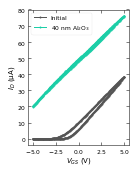

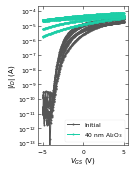

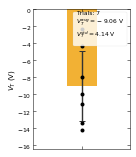

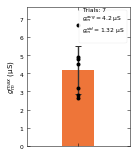

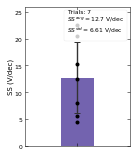

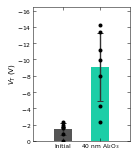

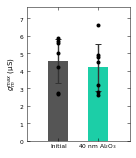

In [3]:
print(' === Figure S5 === ')

color_initial = '#555555'
color_ALD = '#1CCEA7'

data_orig_D1_2 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/1-2', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D3_4 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/3-4', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D3_6 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/3-6', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D7_11 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/7-11', 'GateSweep.json', minExperiment=26, maxExperiment=26, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D24_25 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/24-25', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D28_29 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/28-29', 'GateSweep.json', minExperiment=6, maxExperiment=6, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D43_44 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/43-44', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_orig = [data_orig_D1_2[0], data_orig_D3_4[0], data_orig_D3_6[0], data_orig_D7_11[0], data_orig_D24_25[0], data_orig_D28_29[0], data_orig_D43_44[0]]

data_ALD_D1_2 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/1-2', 'GateSweep.json', minExperiment=6, maxExperiment=6, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D3_4 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/3-4', 'GateSweep.json', minExperiment=14, maxExperiment=14, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D3_6 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/3-6', 'GateSweep.json', minExperiment=9, maxExperiment=9, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D7_11 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/7-11', 'GateSweep.json', minExperiment=43, maxExperiment=43, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD2_D7_11 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/7-11', 'GateSweep.json', minExperiment=40, maxExperiment=40, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D24_25 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/24-25', 'GateSweep.json', minExperiment=10, maxExperiment=10, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D28_29 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/28-29', 'GateSweep.json', minExperiment=15, maxExperiment=15, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D43_44 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/D/43-44', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD = [data_ALD_D1_2[0], data_ALD_D3_4[0], data_ALD_D3_6[0], data_ALD_D7_11[0], data_ALD_D24_25[0], data_ALD_D28_29[0], data_ALD_D43_44[0]]

## === Device Plots ===
#figA1, axesA1 = dpu.makeDevicePlot('TransferCurve', [data_orig_D1_2[0], data_ALD_D1_2[0]], data_orig_D1_2[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5)})
#figA2, axesA2 = dpu.makeDevicePlot('TransferCurve', [data_orig_D3_4[0], data_ALD_D3_4[0]], data_orig_D3_4[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5)})
#figA3, axesA3 = dpu.makeDevicePlot('TransferCurve', [data_orig_D3_6[0], data_ALD_D3_6[0]], data_orig_D3_6[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5)})
#figA4, axesA4 = dpu.makeDevicePlot('TransferCurve', [data_orig_D7_11[0], data_ALD_D7_11[0]], data_orig_D7_11[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5)})
#figA5, axesA5 = dpu.makeDevicePlot('TransferCurve', [data_orig_D24_25[0], data_ALD_D24_25[0]], data_orig_D24_25[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5)})
#figA6, axesA6 = dpu.makeDevicePlot('TransferCurve', [data_orig_D28_29[0], data_ALD_D28_29[0]], data_orig_D28_29[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5)})
figA7, axesA7 = dpu.makeDevicePlot('TransferCurve', [data_orig_D43_44[0], data_ALD_D43_44[0]], data_orig_D43_44[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
#figA8, axesA8 = dpu.makeDevicePlot('TransferCurve', [data_orig_D7_11[0], data_ALD2_D7_11[0]], data_orig_D7_11[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5)})

# Add legend
ax = axesA7[0]
ax.lines[0].set_label('Initial')
ax.lines[2].set_label('40 nm $\mathregular{Al_{{2}}O_{{3}}}$')
ax.legend(loc = 'upper left')
dpu.saveExternalPlot(figA7, 'Al2O3_40nm_typical_device')

# === Chip Plots ===
#figB1, axesB1 = dpu.makeChipPlot('ChipTransferCurve', data_orig[0]['Identifiers'], recentRunChipHistory=data_orig, specificRunChipHistory=data_orig, mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True})
#figB2, axesB2 = dpu.makeChipPlot('ChipTransferCurve', data_ALD[0]['Identifiers'], recentRunChipHistory=data_ALD, specificRunChipHistory=data_ALD, mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True})
#figB3, axesB3 = dpu.makeChipPlot('ChipTransferCurve', data_ALD[0]['Identifiers'], recentRunChipHistory=[*data_orig, *data_ALD], specificRunChipHistory=[*data_orig, *data_ALD], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True})
#figB4, axesB4 = dpu.makeChipPlot('ChipSubthresholdCurve', data_orig[0]['Identifiers'], recentRunChipHistory=data_orig, specificRunChipHistory=data_orig, mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True})
#figB5, axesB5 = dpu.makeChipPlot('ChipSubthresholdCurve', data_ALD[0]['Identifiers'], recentRunChipHistory=data_ALD, specificRunChipHistory=data_ALD, mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True})
figB6, axesB6 = dpu.makeChipPlot('ChipSubthresholdCurve', data_ALD[0]['Identifiers'], recentRunChipHistory=[*data_orig, *data_ALD], specificRunChipHistory=[*data_orig, *data_ALD], mode_parameters={'enableLegend':False, 'figureSizeOverride':(2,2.5), 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'colorsOverride':[color_initial]*len(data_orig)+[color_ALD]*len(data_orig)})

# Add legend
ax = axesB6[0]
ax.lines[0].set_label('Initial')
ax.lines[7].set_label('40 nm $\mathregular{Al_{{2}}O_{{3}}}$')
ax.legend(loc = 'lower right')
dpu.saveExternalPlot(figB6, 'Al2O3_40nm_all_devices')

## === Metric Plots ===
fig7, axes7 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_ALD)            , data_ALD[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig8, axes8 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_ALD)            , data_ALD[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig9, axes9 = dpu.makeDevicePlot('BoxPlotSubthresholdSwing', (data_ALD)            , data_ALD[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})

fig10, axes10 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_orig + data_ALD), data_ALD[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'sweepDirection':'forward', 'boxPlotCategories':[('Initial',len(data_orig)), ('40 nm $\mathregular{Al_{{2}}O_{{3}}}$',len(data_ALD))], 'figureSizeOverride':(2,2.3), 'colorsOverride':[color_initial, color_ALD]})
axes10[0].set_ylim(top=0)
axes10[0].invert_yaxis()
axes10[0].set_xticklabels(axes10[0].get_xticklabels(), va='center', y=-0.025)
dpu.saveExternalPlot(fig10, 'BoxPlotThresholdVoltage')
fig11, axes11 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_orig + data_ALD), data_ALD[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'sweepDirection':'forward', 'boxPlotCategories':[('Initial',len(data_orig)), ('40 nm $\mathregular{Al_{{2}}O_{{3}}}$',len(data_ALD))], 'figureSizeOverride':(2,2.3), 'colorsOverride':[color_initial, color_ALD]})
axes11[0].set_xticklabels(axes11[0].get_xticklabels(), va='center', y=-0.025)
dpu.saveExternalPlot(fig11, 'BoxPlotTransconductance')

# === Normalized gm Extraction ===
gm_list = [3.1855105657748343e-06, 2.615254787614642e-06, 2.8202205406431696e-06, 4.89599465361688e-06, 4.50757891915143e-06, 4.77376598007596e-06, 6.63651461360121e-06]
W_ch = [4.5,3.5,3,3,3,4.5,3.5]

gm_width_normalized = [gm_list[i]/W_ch[i] for i in range(len(W_ch))]
print('========')
print('gm normalized: ' + str(gm_width_normalized))
print('gm normalized mean: ' + str(np.mean(gm_width_normalized)))
print('gm normalized std: ' + str(np.std(gm_width_normalized)))

 === Figure S6 === 
Plotting TransferCurve plot.
Finished plotting TransferCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.9626576900482178)
Saving figures.
Figures saved. (Seconds elapsed: 0.49743199348449707)
Plotting ChipSubthresholdCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 1.1345882415771484)
Saving figures.
Figures saved. (Seconds elapsed: 0.6697840690612793)
Plotting BoxPlotThresholdVoltage plot.


No handles with labels found to put in legend.


Extracted VT: [-10.62362236218012, -13.259289390746162, -5.031004569090007, -12.300385571035898, -5.538079547495935, -10.613943750743601, -3.666280718303738, -5.266299793045952, -6.781287519538754, -6.618407687865215, -10.710986564885488, -6.195676165206022, -13.152182081725156]
Finished plotting BoxPlotThresholdVoltage plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.8515868186950684)
Plotting BoxPlotTransconductance plot.


No handles with labels found to put in legend.


Extracted gm: [4.077133978328626e-06, 3.791064507962481e-06, 3.5385263866301945e-06, 4.843182232011631e-06, 8.871144786453394e-06, 3.0525834747091946e-06, 7.027242000562041e-06, 3.7282295733646246e-06, 4.938886416998175e-06, 5.602449244668966e-06, 6.066907492228665e-06, 8.35499862464268e-06, 4.6486863283224625e-06]
Finished plotting BoxPlotTransconductance plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.8763182163238525)
Plotting BoxPlotSubthresholdSwing plot.


No handles with labels found to put in legend.


Extracted SS_mV_dec: [10124.02351536785, 19910.673253352317, 1890.010143299565, 12444.256843161975, 904.5161473274858, 8820.43438910399, 735.2406584858927, 731.0341170242108, 2603.3197893342117, 1679.6182659313151, 8780.941346577081, 884.0258535472143, 14417.46475438805]
Finished plotting BoxPlotSubthresholdSwing plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.7387688159942627)
Plotting BoxPlotThresholdVoltage plot.
Extracted VT: [-2.3625440478212107, -2.6699046668297797, -2.5160516860929176, -3.251073268811156, -0.7630246216152989, -1.9737999584101913, -2.6398989044954235, -2.544488408256363, -2.4429702045663784, -2.4059674523461188, -3.6389246991424224, -2.0559844094412325, -2.562179779661246, -10.62362236218012, -13.259289390746162, -5.031004569090007, -12.300385571035898, -5.538079547495935, -10.613943750743601, -3.666280718303738, -5.266299793045952, -6.781287519538754, -6.618407687865215, -10.710986564885488, -6.195676165206022, -13.152182081725156]
Finished plotting Box

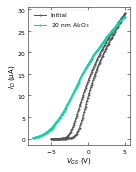

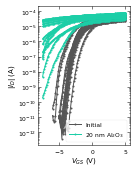

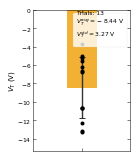

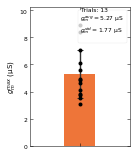

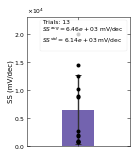

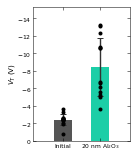

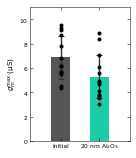

In [5]:
print(' === Figure S6 === ')

color_initial = '#555555'
color_ALD = '#1CCEA7'

data_orig_D4_5 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/4-5', 'GateSweep.json',     minExperiment=1, maxExperiment=1, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D10_11 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/10-11', 'GateSweep.json', minExperiment=1, maxExperiment=1, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D20_21 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/20-21', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=1, maxRelativeIndex=1)
data_orig_D24_25 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/24-25', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D27_30 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/27-30', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D31_32 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/31-32', 'GateSweep.json', minExperiment=1, maxExperiment=1, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D33_34 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/33-34', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D42_43 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/42-43', 'GateSweep.json', minExperiment=1, maxExperiment=1, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D44_45 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/44-45', 'GateSweep.json', minExperiment=1, maxExperiment=1, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D50_51 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/50-51', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=1, maxRelativeIndex=1)
data_orig_D52_53 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/52-53', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D59_62 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/59-62', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D63_64 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/63-64', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=1, maxRelativeIndex=1)
data_orig = [data_orig_D4_5[0], data_orig_D10_11[0], data_orig_D20_21[0], data_orig_D24_25[0], data_orig_D27_30[0], data_orig_D31_32[0], data_orig_D33_34[0], data_orig_D42_43[0], data_orig_D44_45[0], data_orig_D50_51[0], data_orig_D52_53[0], data_orig_D59_62[0], data_orig_D63_64[0]]

data_ALD_D4_5 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/4-5', 'GateSweep.json',     minExperiment=6, maxExperiment=6, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D10_11 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/10-11', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D20_21 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/20-21', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D24_25 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/24-25', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D27_30 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/27-30', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D31_32 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/31-32', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D33_34 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/33-34', 'GateSweep.json', minExperiment=7, maxExperiment=7, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D42_43 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/42-43', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D44_45 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/44-45', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D50_51 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/50-51', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D52_53 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/52-53', 'GateSweep.json', minExperiment=5, maxExperiment=5, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D59_62 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/59-62', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD_D63_64 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/J/63-64', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_ALD = [data_ALD_D4_5[0], data_ALD_D10_11[0], data_ALD_D20_21[0], data_ALD_D24_25[0], data_ALD_D27_30[0], data_ALD_D31_32[0], data_ALD_D33_34[0], data_ALD_D42_43[0], data_ALD_D44_45[0], data_ALD_D50_51[0], data_ALD_D52_53[0], data_ALD_D59_62[0], data_ALD_D63_64[0]]

## === Device Plots ===
#figA1, axesA1 = dpu.makeDevicePlot('TransferCurve', [data_orig_D4_5[0], data_ALD_D4_5[0]], data_orig_D4_5[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
#figA2, axesA2 = dpu.makeDevicePlot('TransferCurve', [data_orig_D10_11[0], data_ALD_D10_11[0]], data_orig_D10_11[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
figA3, axesA3 = dpu.makeDevicePlot('TransferCurve', [data_orig_D20_21[0], data_ALD_D20_21[0]], data_orig_D20_21[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
#figA4, axesA4 = dpu.makeDevicePlot('TransferCurve', [data_orig_D24_25[0], data_ALD_D24_25[0]], data_orig_D24_25[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
#figA5, axesA5 = dpu.makeDevicePlot('TransferCurve', [data_orig_D27_30[0], data_ALD_D27_30[0]], data_orig_D27_30[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
#figA6, axesA6 = dpu.makeDevicePlot('TransferCurve', [data_orig_D31_32[0], data_ALD_D31_32[0]], data_orig_D31_32[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
#figA7, axesA7 = dpu.makeDevicePlot('TransferCurve', [data_orig_D33_34[0], data_ALD_D33_34[0]], data_orig_D33_34[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
#figA8, axesA8 = dpu.makeDevicePlot('TransferCurve', [data_orig_D42_43[0], data_ALD_D42_43[0]], data_orig_D42_43[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
#figA9, axesA9 = dpu.makeDevicePlot('TransferCurve', [data_orig_D44_45[0], data_ALD_D44_45[0]], data_orig_D44_45[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
#figA10, axesA10 = dpu.makeDevicePlot('TransferCurve', [data_orig_D50_51[0], data_ALD_D50_51[0]], data_orig_D50_51[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
#figA11, axesA11 = dpu.makeDevicePlot('TransferCurve', [data_orig_D52_53[0], data_ALD_D52_53[0]], data_orig_D52_53[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
#figA12, axesA12 = dpu.makeDevicePlot('TransferCurve', [data_orig_D59_62[0], data_ALD_D59_62[0]], data_orig_D59_62[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})
#figA13, axesA13 = dpu.makeDevicePlot('TransferCurve', [data_orig_D63_64[0], data_ALD_D63_64[0]], data_orig_D63_64[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_ALD]})

# Add legend
ax = axesA3[0]
ax.lines[0].set_label('Initial')
ax.lines[2].set_label('20 nm $\mathregular{Al_{{2}}O_{{3}}}$')
ax.legend(loc = 'upper left')
dpu.saveExternalPlot(figA3, 'Al2O3_20nm_typical_device')

## === Chip Plots ===
figB6, axesB6 = dpu.makeChipPlot('ChipSubthresholdCurve', data_ALD[0]['Identifiers'], recentRunChipHistory=[*data_orig, *data_ALD], specificRunChipHistory=[*data_orig, *data_ALD], mode_parameters={'enableLegend':False, 'figureSizeOverride':(2,2.5), 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'colorsOverride':[color_initial]*len(data_orig)+[color_ALD]*len(data_orig)})

# Add legend
ax = axesB6[0]
ax.lines[0].set_label('Initial')
ax.lines[13].set_label('20 nm $\mathregular{Al_{{2}}O_{{3}}}$')
ax.legend(loc = 'lower right')
dpu.saveExternalPlot(figB6, 'Al2O3_20nm_all_devices')

## === Metric Plots ===
fig7, axes7 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_ALD)            , data_ALD[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig8, axes8 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_ALD)            , data_ALD[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig9, axes9 = dpu.makeDevicePlot('BoxPlotSubthresholdSwing', (data_ALD)            , data_ALD[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})

fig10, axes10 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_orig + data_ALD), data_ALD[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'sweepDirection':'forward', 'boxPlotCategories':[('Initial',len(data_orig)), ('20 nm $\mathregular{Al_{{2}}O_{{3}}}$',len(data_ALD))], 'figureSizeOverride':(2,2.3), 'colorsOverride':[color_initial, color_ALD]})
axes10[0].set_ylim(top=0)
axes10[0].invert_yaxis()
axes10[0].set_xticklabels(axes10[0].get_xticklabels(), va='center', y=-0.025)
dpu.saveExternalPlot(fig10, 'BoxPlotThresholdVoltage')
fig11, axes11 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_orig + data_ALD), data_ALD[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'sweepDirection':'forward', 'boxPlotCategories':[('Initial',len(data_orig)), ('20 nm $\mathregular{Al_{{2}}O_{{3}}}$',len(data_ALD))], 'figureSizeOverride':(2,2.3), 'colorsOverride':[color_initial, color_ALD]})
#axes11[0].set_ylim(top=9.8)
axes11[0].set_xticklabels(axes11[0].get_xticklabels(), va='center', y=-0.025)
dpu.saveExternalPlot(fig11, 'BoxPlotTransconductance')


## === Normalized gm Extraction ===
gm_list = [4.077133978328626e-06, 3.791064507962481e-06, 3.4503328825830575e-06, 4.843182232011631e-06, 8.871144786453394e-06, 3.0525834747091946e-06, 7.027242000562041e-06, 3.7282295733646246e-06, 4.938886416998175e-06, 5.602449244668966e-06, 5.8241560192285954e-06, 8.08818412896319e-06, 4.6486863283224625e-06]
W_ch = [2,2.5,2,3,4,2,4,1.5,2,2,4,4,3.5]

gm_width_normalized = [gm_list[i]/W_ch[i] for i in range(len(W_ch))]
print('========')
print('gm normalized: ' + str(gm_width_normalized))
print('gm normalized mean: ' + str(np.mean(gm_width_normalized)))
print('gm normalized std: ' + str(np.std(gm_width_normalized)))

 === Figure S7 === 
Plotting TransferCurve plot.
Finished plotting TransferCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 1.1423559188842773)
Saving figures.
Figures saved. (Seconds elapsed: 0.7633299827575684)
Plotting ChipSubthresholdCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.9623618125915527)
Saving figures.
Figures saved. (Seconds elapsed: 0.8312067985534668)
Plotting BoxPlotThresholdVoltage plot.


No handles with labels found to put in legend.


Extracted VT: [-1.6420948125861305, -2.312226661825483, -2.592473646170381, -2.145632807747314, -1.0041173374349528, -1.9106290423578243, -2.625555839216231, -2.270492268592923, -1.2642607719073566, -1.4406545773662847, -3.0074024059236386, -1.4431399232695885, -0.31295916129872353, -2.1245808803987334, -1.0540220217118017, -0.9272141986434899, -2.045633270912812]
Finished plotting BoxPlotThresholdVoltage plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.5861308574676514)
Plotting BoxPlotTransconductance plot.


No handles with labels found to put in legend.


Extracted gm: [7.447502675287559e-06, 9.184149741165902e-06, 8.423262954286189e-06, 5.589243615302851e-06, 4.591955141515177e-06, 5.203165841808853e-06, 7.732876202914472e-06, 9.238896012251577e-06, 6.827105089036407e-06, 4.711272182923589e-06, 3.508271554765858e-06, 3.081589742067724e-06, 4.025122557070567e-06, 4.7536144614295155e-06, 5.5728770451980745e-06, 4.515025430502621e-06, 4.555134554850747e-06]
Finished plotting BoxPlotTransconductance plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.6035130023956299)
Plotting BoxPlotSubthresholdSwing plot.


No handles with labels found to put in legend.


Extracted SS_mV_dec: [276.7803696087189, 263.3429364200647, 460.6037875278619, 244.76369293662245, 302.0385102458094, 275.66800410135653, 256.9236754070262, 405.5319755485117, 367.8724544342602, 393.63638848994947, 1825.7665644038107, 278.2496497411053, 398.81950572377497, 306.08101459553455, 332.532674574577, 302.99573829476947, 534.6398138249076]
Finished plotting BoxPlotSubthresholdSwing plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.5582101345062256)
Plotting BoxPlotThresholdVoltage plot.
Extracted VT: [-2.9961865830388064, -3.264785517120846, -3.6787733924397816, -3.1059130250901523, -2.926561816466449, -3.6174737043390603, -2.9817505686611967, -3.052080794267687, -2.7723771017828382, -2.951174965968904, -3.5778119226264113, -2.863153488089974, -3.294855935878046, -2.780773513018692, -3.822681119871365, -2.078656681474505, -3.249485964454434, -1.6420948125861305, -2.312226661825483, -2.592473646170381, -2.145632807747314, -1.0041173374349528, -1.9106290423578243, -2.6255

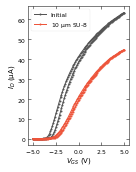

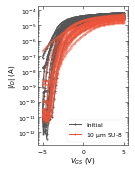

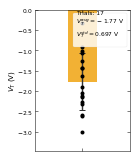

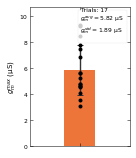

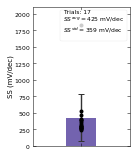

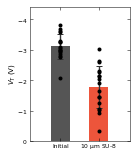

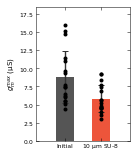

In [8]:
print(' === Figure S7 === ')

color_initial = '#555555'
color_SU8 = '#ed553b' #'#b00000'  #'#f2b134'

data_orig_D1_32  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/1-32', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D3_6   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/3-6',  'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D4_5   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/4-5',  'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D11_12 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/11-12', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D13_14 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/13-14', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D15_18 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/15-18', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D20_21 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/20-21', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D28_29 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/28-29', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D33_46 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/33-46', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D36_37 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/36-37', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D39_42 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/39-42', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D44_45 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/44-45', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=1, maxRelativeIndex=1)
data_orig_D48_49 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/48-49', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D50_51 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/50-51', 'GateSweep.json', minExperiment=1, maxExperiment=1, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D52_53 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/52-53', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D54_55 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/54-55', 'GateSweep.json', minExperiment=1, maxExperiment=1, minRelativeIndex=0, maxRelativeIndex=0)
data_orig_D60_61 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/60-61', 'GateSweep.json', minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig = [data_orig_D1_32[0], data_orig_D3_6[0], data_orig_D4_5[0], data_orig_D11_12[0], data_orig_D13_14[0], data_orig_D15_18[0], data_orig_D20_21[0], data_orig_D28_29[0], data_orig_D33_46[0], data_orig_D36_37[0], data_orig_D39_42[0], data_orig_D44_45[0], data_orig_D48_49[0], data_orig_D50_51[0], data_orig_D52_53[0], data_orig_D54_55[0], data_orig_D60_61[0]]

data_SU8_D1_32  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/1-32', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D3_6   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/3-6',  'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D4_5   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/4-5',  'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D11_12 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/11-12', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D13_14 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/13-14', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D15_18 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/15-18', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D20_21 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/20-21', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D28_29 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/28-29', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D33_46 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/33-46', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_SU8_D36_37 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/36-37', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D39_42 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/39-42', 'GateSweep.json', minExperiment=5, maxExperiment=5, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D44_45 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/44-45', 'GateSweep.json', minExperiment=6, maxExperiment=6, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D48_49 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/48-49', 'GateSweep.json', minExperiment=3, maxExperiment=3, minRelativeIndex=0, maxRelativeIndex=0)
data_SU8_D50_51 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/50-51', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D52_53 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/52-53', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D54_55 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/54-55', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8_D60_61 = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/I/60-61', 'GateSweep.json', minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SU8 = [data_SU8_D1_32[0], data_SU8_D3_6[0], data_SU8_D4_5[0], data_SU8_D11_12[0], data_SU8_D13_14[0], data_SU8_D15_18[0], data_SU8_D20_21[0], data_SU8_D28_29[0], data_SU8_D33_46[0], data_SU8_D36_37[0], data_SU8_D39_42[0], data_SU8_D44_45[0], data_SU8_D48_49[0], data_SU8_D50_51[0], data_SU8_D52_53[0], data_SU8_D54_55[0], data_SU8_D60_61[0]]

## === Device Plots ===
#figA1, axesA1   = dpu.makeDevicePlot('TransferCurve', [data_orig_D1_32[0],  data_SU8_D1_32[0]],  data_orig_D1_32[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
figA2, axesA2   = dpu.makeDevicePlot('TransferCurve', [data_orig_D3_6[0],   data_SU8_D3_6[0]],   data_orig_D3_6[0]['Identifiers'],   mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA3, axesA3   = dpu.makeDevicePlot('TransferCurve', [data_orig_D4_5[0],   data_SU8_D4_5[0]],   data_orig_D4_5[0]['Identifiers'],   mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA4, axesA4   = dpu.makeDevicePlot('TransferCurve', [data_orig_D11_12[0], data_SU8_D11_12[0]], data_orig_D11_12[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA5, axesA5   = dpu.makeDevicePlot('TransferCurve', [data_orig_D13_14[0], data_SU8_D13_14[0]], data_orig_D13_14[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA6, axesA6   = dpu.makeDevicePlot('TransferCurve', [data_orig_D15_18[0], data_SU8_D15_18[0]], data_orig_D15_18[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA7, axesA7   = dpu.makeDevicePlot('TransferCurve', [data_orig_D20_21[0], data_SU8_D20_21[0]], data_orig_D20_21[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA8, axesA8   = dpu.makeDevicePlot('TransferCurve', [data_orig_D28_29[0], data_SU8_D28_29[0]], data_orig_D28_29[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA9, axesA9   = dpu.makeDevicePlot('TransferCurve', [data_orig_D33_46[0], data_SU8_D33_46[0]], data_orig_D33_46[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA10, axesA10 = dpu.makeDevicePlot('TransferCurve', [data_orig_D36_37[0], data_SU8_D36_37[0]], data_orig_D36_37[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA11, axesA11 = dpu.makeDevicePlot('TransferCurve', [data_orig_D39_42[0], data_SU8_D39_42[0]], data_orig_D39_42[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA12, axesA12 = dpu.makeDevicePlot('TransferCurve', [data_orig_D44_45[0], data_SU8_D44_45[0]], data_orig_D44_45[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA13, axesA13 = dpu.makeDevicePlot('TransferCurve', [data_orig_D48_49[0], data_SU8_D48_49[0]], data_orig_D48_49[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA14, axesA14 = dpu.makeDevicePlot('TransferCurve', [data_orig_D50_51[0], data_SU8_D50_51[0]], data_orig_D50_51[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA15, axesA15 = dpu.makeDevicePlot('TransferCurve', [data_orig_D52_53[0], data_SU8_D52_53[0]], data_orig_D52_53[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA16, axesA16 = dpu.makeDevicePlot('TransferCurve', [data_orig_D54_55[0], data_SU8_D54_55[0]], data_orig_D54_55[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})
#figA17, axesA17 = dpu.makeDevicePlot('TransferCurve', [data_orig_D60_61[0], data_SU8_D60_61[0]], data_orig_D60_61[0]['Identifiers'], mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SU8]})

# Add legend
ax = axesA2[0]
ax.lines[0].set_label('Initial')
ax.lines[2].set_label('10 $\mathregular{\\mu}$m SU-8')
ax.legend(loc = 'upper left')
dpu.saveExternalPlot(figA2, 'SU8_typical_device')

## === Chip Plots ===
figB6, axesB6 = dpu.makeChipPlot('ChipSubthresholdCurve', data_orig[0]['Identifiers'], recentRunChipHistory=[*data_orig, *data_SU8], specificRunChipHistory=[*data_orig, *data_SU8], mode_parameters={'enableLegend':False, 'figureSizeOverride':(2,2.5), 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'colorsOverride':[color_initial]*len(data_orig)+[color_SU8]*len(data_SU8)})

# Add legend
ax = axesB6[0]
ax.lines[0].set_label('Initial')
ax.lines[len(data_orig)].set_label('10 $\mathregular{\\mu}$m SU-8')
ax.legend(loc = 'lower right')
[ax.lines[i].set_alpha(0.5) for i in range(len(data_orig),len(data_orig) + len(data_SU8))]
dpu.saveExternalPlot(figB6, 'SU8_all_devices')

## === Metric Plots ===
fig7, axes7 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_SU8)            , data_SU8[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig8, axes8 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_SU8)            , data_SU8[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig9, axes9 = dpu.makeDevicePlot('BoxPlotSubthresholdSwing', (data_SU8)            , data_SU8[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})

fig10, axes10 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_orig + data_SU8), data_SU8[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'sweepDirection':'forward', 'boxPlotCategories':[('Initial',len(data_orig)), ('10 $\mathregular{\\mu}$m SU-8',len(data_SU8))], 'figureSizeOverride':(2,2.3), 'colorsOverride':[color_initial, color_SU8]})
axes10[0].set_yticks([-4,-3,-2,-1,0])
axes10[0].set_ylim(top=0)
axes10[0].invert_yaxis()
axes10[0].set_xticklabels(axes10[0].get_xticklabels(), va='center', y=-0.025)
dpu.saveExternalPlot(fig10, 'BoxPlotThresholdVoltage')
fig11, axes11 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_orig + data_SU8), data_SU8[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'sweepDirection':'forward', 'boxPlotCategories':[('Initial',len(data_orig)), ('10 $\mathregular{\\mu}$m SU-8',len(data_SU8))], 'figureSizeOverride':(2,2.3), 'colorsOverride':[color_initial, color_SU8]})
axes11[0].set_xticklabels(axes11[0].get_xticklabels(), va='center', y=-0.025)
dpu.saveExternalPlot(fig11, 'BoxPlotTransconductance')

## === Normalized gm Extraction ===
gm_list = [7.447502675287559e-06, 9.184149741165902e-06, 8.423262954286189e-06, 5.589243615302851e-06, 4.591955141515177e-06, 5.203165841808853e-06, 7.732876202914472e-06, 9.238896012251577e-06, 6.827105089036407e-06, 4.711272182923589e-06, 3.508271554765858e-06, 3.081589742067724e-06, 4.025122557070567e-06, 4.7536144614295155e-06, 5.5728770451980745e-06, 4.515025430502621e-06, 4.555134554850747e-06]
W_ch = [3.5,4.25,4,2.5,3,2,3.5,5,3.5,2.5,3,2.5,2,4,2.75,1.75,3]

gm_width_normalized = [gm_list[i]/W_ch[i] for i in range(len(W_ch))]
print('========')
print('gm normalized: ' + str(gm_width_normalized))
print('gm normalized mean: ' + str(np.mean(gm_width_normalized)))
print('gm normalized std: ' + str(np.std(gm_width_normalized)))


 === Figure S8 === 
Plotting TransferCurve plot.
Finished plotting TransferCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.7187268733978271)
Saving figures.
Figures saved. (Seconds elapsed: 0.6189491748809814)
Plotting ChipSubthresholdCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 1.297563076019287)
Saving figures.
Figures saved. (Seconds elapsed: 1.0251169204711914)
Plotting BoxPlotThresholdVoltage plot.


No handles with labels found to put in legend.


Extracted VT: [-1.4681556210930895, -1.2436657914275238, 0.8658804493537686, 0.0937055139233036, -1.4260171384365619, -0.17774418334428635, -0.23196249777075584, -1.0005053303282943, -1.0205355286274258, -0.16929225843756635, 1.0201992644977558, -1.481802430091271, -1.555197246809802, -1.1971516137934368, 0.051043703046524516, -0.24940391304550955, -1.6299069560077006, -0.39318714244027586, -1.5918305081553208]
Finished plotting BoxPlotThresholdVoltage plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.7611610889434814)
Plotting BoxPlotTransconductance plot.


No handles with labels found to put in legend.


Extracted gm: [2.6277490102157194e-06, 5.617720389425706e-06, 5.65583934826148e-06, 4.464216859412531e-06, 1.8077977591554251e-06, 1.232170940512203e-06, 3.5307923490532214e-06, 3.8703787536041655e-06, 2.192964497192524e-06, 3.7373273469476546e-06, 6.130720111876929e-06, 1.9209019207688945e-06, 4.29826964231743e-06, 1.424299279897183e-06, 5.036200707542804e-06, 3.0392658242515925e-06, 2.459887053201849e-06, 3.7264943551931584e-06, 1.2494532725799488e-06]
Finished plotting BoxPlotTransconductance plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.8926727771759033)
Plotting BoxPlotSubthresholdSwing plot.


No handles with labels found to put in legend.


Extracted SS_mV_dec: [419.52014696417336, 374.56069764036624, 403.2144037876167, 375.30617761174284, 336.7116959302627, 378.0647120774189, 318.46136868128343, 323.86601380776995, 316.02208476183546, 341.2532309459754, 405.948091588707, 403.1862426703265, 301.63767674997007, 320.64906669005165, 345.41018443447393, 363.9219912400806, 315.58288714994626, 374.40978093905164, 382.4712922129972]
Finished plotting BoxPlotSubthresholdSwing plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.5679128170013428)
Plotting BoxPlotThresholdVoltage plot.
Extracted VT: [-2.850264721788391, -2.763868609675142, -2.1013520327457935, -2.4329721404017457, -2.8583158266635476, -1.651365544400648, -2.3468734369763444, -2.8964590175640814, -2.6383446965780197, -2.896061974955422, -2.481316628041586, -2.575118343316267, -2.219251206892975, -2.6836310411336872, -2.5394646551296556, -1.8465120592775426, -2.389763354081809, -2.023558990648238, -2.5127871614216226, -1.4681556210930895, -1.2436657914275238, 0.8

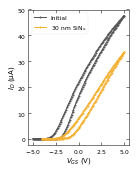

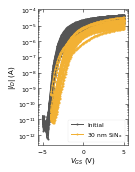

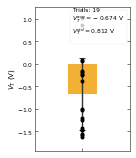

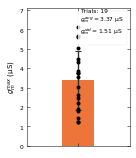

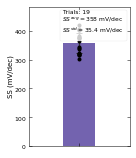

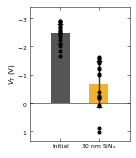

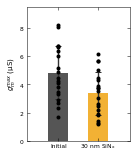

In [17]:
print(' === Figure S8 === ')

color_initial = '#555555'
color_SiNx = '#f2b134' #'#ee7539'

data_orig_D2_13   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/2-13',  'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D3_4    = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/3-4',   'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D5_6    = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/5-6',   'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D7_8    = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/7-8',   'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D9_10   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/9-10',  'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=1, maxRelativeIndex=1)
data_orig_D11_12  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/11-12', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D14_15  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/14-15', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D16_17  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/16-17', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D18_19  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/18-19', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=1, maxRelativeIndex=1)
data_orig_D20_27  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/20-27', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D23_24  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/23-24', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D29_30  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/29-30', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D37_38  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/37-38', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D44_45  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/44-45', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
#data_orig_D50_51  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/50-51', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D52_53  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/52-53', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=1, maxRelativeIndex=1)
data_orig_D55_58  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/55-58', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=1, maxRelativeIndex=1)
data_orig_D56_57  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/56-57', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D59_62  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/59-62', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig_D60_61  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/60-61', 'GateSweep.json',  minExperiment=2, maxExperiment=2, minRelativeIndex=2, maxRelativeIndex=2)
data_orig = [data_orig_D2_13[0], data_orig_D3_4[0], data_orig_D5_6[0], data_orig_D7_8[0], data_orig_D9_10[0], data_orig_D11_12[0], data_orig_D14_15[0], data_orig_D16_17[0], data_orig_D18_19[0], data_orig_D20_27[0], data_orig_D23_24[0], data_orig_D29_30[0], data_orig_D37_38[0], data_orig_D44_45[0], data_orig_D52_53[0], data_orig_D55_58[0], data_orig_D56_57[0], data_orig_D59_62[0], data_orig_D60_61[0]]

data_SiN_D2_13   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/2-13',  'GateSweep.json',  minExperiment=9, maxExperiment=9, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D3_4    = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/3-4',   'GateSweep.json',  minExperiment=6, maxExperiment=6, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D5_6    = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/5-6',   'GateSweep.json',  minExperiment=6, maxExperiment=6, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D7_8    = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/7-8',   'GateSweep.json',  minExperiment=6, maxExperiment=6, minRelativeIndex=1, maxRelativeIndex=1)
data_SiN_D9_10   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/9-10',  'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D11_12  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/11-12', 'GateSweep.json',  minExperiment=5, maxExperiment=5, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D14_15  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/14-15', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D16_17  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/16-17', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D18_19  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/18-19', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D20_27  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/20-27', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D23_24  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/23-24', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D29_30  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/29-30', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D37_38  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/37-38', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D44_45  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/44-45', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=1, maxRelativeIndex=1)
#data_SiN_D50_51  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/50-51', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D52_53  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/52-53', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=1, maxRelativeIndex=1)
data_SiN_D55_58  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/55-58', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D56_57  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/56-57', 'GateSweep.json',  minExperiment=6, maxExperiment=6, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D59_62  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/59-62', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SiN_D60_61  = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/60-61', 'GateSweep.json',  minExperiment=4, maxExperiment=4, minRelativeIndex=2, maxRelativeIndex=2)
data_SiNx = [data_SiN_D2_13[0], data_SiN_D3_4[0], data_SiN_D5_6[0], data_SiN_D7_8[0], data_SiN_D9_10[0], data_SiN_D11_12[0], data_SiN_D14_15[0], data_SiN_D16_17[0], data_SiN_D18_19[0], data_SiN_D20_27[0], data_SiN_D23_24[0], data_SiN_D29_30[0], data_SiN_D37_38[0], data_SiN_D44_45[0], data_SiN_D52_53[0], data_SiN_D55_58[0], data_SiN_D56_57[0], data_SiN_D59_62[0], data_SiN_D60_61[0]]

## === Device Plots ===
#figA1, axesA1   = dpu.makeDevicePlot('TransferCurve', [data_orig_D2_13[0],   data_SiN_D2_13[0]],   data_orig_D2_13[0]['Identifiers'],   mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
figA2, axesA2   = dpu.makeDevicePlot('TransferCurve', [data_orig_D3_4[0],    data_SiN_D3_4[0]],    data_orig_D3_4[0]['Identifiers'],    mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA3, axesA3   = dpu.makeDevicePlot('TransferCurve', [data_orig_D5_6[0],    data_SiN_D5_6[0]],    data_orig_D5_6[0]['Identifiers'],    mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA4, axesA4   = dpu.makeDevicePlot('TransferCurve', [data_orig_D7_8[0],    data_SiN_D7_8[0]],    data_orig_D7_8[0]['Identifiers'],    mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA5, axesA5   = dpu.makeDevicePlot('TransferCurve', [data_orig_D9_10[0],   data_SiN_D9_10[0]],   data_orig_D9_10[0]['Identifiers'],   mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA6, axesA6   = dpu.makeDevicePlot('TransferCurve', [data_orig_D11_12[0],  data_SiN_D11_12[0]],  data_orig_D11_12[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA7, axesA7   = dpu.makeDevicePlot('TransferCurve', [data_orig_D14_15[0],  data_SiN_D14_15[0]],  data_orig_D14_15[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA8, axesA8   = dpu.makeDevicePlot('TransferCurve', [data_orig_D16_17[0],  data_SiN_D16_17[0]],  data_orig_D16_17[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA9, axesA9   = dpu.makeDevicePlot('TransferCurve', [data_orig_D18_19[0],  data_SiN_D18_19[0]],  data_orig_D18_19[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA10, axesA10 = dpu.makeDevicePlot('TransferCurve', [data_orig_D20_27[0],  data_SiN_D20_27[0]],  data_orig_D20_27[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA11, axesA11 = dpu.makeDevicePlot('TransferCurve', [data_orig_D23_24[0],  data_SiN_D23_24[0]],  data_orig_D23_24[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA12, axesA12 = dpu.makeDevicePlot('TransferCurve', [data_orig_D29_30[0],  data_SiN_D29_30[0]],  data_orig_D29_30[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA13, axesA13 = dpu.makeDevicePlot('TransferCurve', [data_orig_D37_38[0],  data_SiN_D37_38[0]],  data_orig_D37_38[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA14, axesA14 = dpu.makeDevicePlot('TransferCurve', [data_orig_D44_45[0],  data_SiN_D44_45[0]],  data_orig_D44_45[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA15, axesA15 = dpu.makeDevicePlot('TransferCurve', [data_orig_D52_53[0],  data_SiN_D52_53[0]],  data_orig_D52_53[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA16, axesA16 = dpu.makeDevicePlot('TransferCurve', [data_orig_D55_58[0],  data_SiN_D55_58[0]],  data_orig_D55_58[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA17, axesA17 = dpu.makeDevicePlot('TransferCurve', [data_orig_D56_57[0],  data_SiN_D56_57[0]],  data_orig_D56_57[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA18, axesA18 = dpu.makeDevicePlot('TransferCurve', [data_orig_D59_62[0],  data_SiN_D59_62[0]],  data_orig_D59_62[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})
#figA19, axesA19 = dpu.makeDevicePlot('TransferCurve', [data_orig_D60_61[0],  data_SiN_D60_61[0]],  data_orig_D60_61[0]['Identifiers'],  mode_parameters={'enableLegend':False, 'enableColorBar':False, 'sweepDirection':'both', 'publication_mode':True, 'figureSizeOverride':(2,2.5), 'colorsOverride':[color_initial, color_SiNx]})

# Add legend
ax = axesA2[0]
ax.lines[0].set_label('Initial')
ax.lines[2].set_label('30 nm $\\mathregular{SiN_x}$')
ax.legend(loc = 'upper left')
dpu.saveExternalPlot(figA2, 'SiNx_typical_device')

## === Chip Plots ===
figB6, axesB6 = dpu.makeChipPlot('ChipSubthresholdCurve', data_orig[0]['Identifiers'], recentRunChipHistory=[*data_orig, *data_SiNx], specificRunChipHistory=[*data_orig, *data_SiNx], mode_parameters={'enableLegend':False, 'figureSizeOverride':(2,2.5), 'enableColorBar':False, 'sweepDirection':'forward', 'publication_mode':True, 'colorsOverride':[color_initial]*len(data_orig)+[color_SiNx]*len(data_SiNx)})

# Add legend
ax = axesB6[0]
ax.lines[0].set_label('Initial')
ax.lines[len(data_orig)].set_label('30 nm $\\mathregular{SiN_x}$')
ax.legend(loc = 'lower right')
dpu.saveExternalPlot(figB6, 'SiNx_all_devices')

## === Metric Plots ===
fig7, axes7 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_SiNx)         , data_SiNx[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig8, axes8 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_SiNx)         , data_SiNx[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})
fig9, axes9 = dpu.makeDevicePlot('BoxPlotSubthresholdSwing', (data_SiNx)        , data_SiNx[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':True,  'sweepDirection':'forward'})

fig10, axes10 = dpu.makeDevicePlot('BoxPlotThresholdVoltage', (data_orig + data_SiNx), data_SiNx[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'sweepDirection':'forward', 'boxPlotCategories':[('Initial',len(data_orig)), ('30 nm $\\mathregular{SiN_x}$',len(data_SiNx))], 'figureSizeOverride':(2,2.3), 'colorsOverride':[color_initial, color_SiNx]})
#axes10[0].set_ylim(top=0)
xlimits = axes10[0].get_xlim()
axes10[0].plot([-2,3], [0,0], color='black', lw=0.5)
axes10[0].set_xlim(xlimits)
axes10[0].invert_yaxis()
axes10[0].set_xticklabels(axes10[0].get_xticklabels(), va='center', y=-0.025)
dpu.saveExternalPlot(fig10, 'BoxPlotThresholdVoltage')
fig11, axes11 = dpu.makeDevicePlot('BoxPlotTransconductance', (data_orig + data_SiNx), data_SiNx[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'sweepDirection':'forward', 'boxPlotCategories':[('Initial',len(data_orig)), ('30 nm $\\mathregular{SiN_x}$',len(data_SiNx))], 'figureSizeOverride':(2,2.3), 'colorsOverride':[color_initial, color_SiNx]})
axes11[0].set_xticklabels(axes11[0].get_xticklabels(), va='center', y=-0.025)
dpu.saveExternalPlot(fig11, 'BoxPlotTransconductance')

## === Normalized gm Extraction ===
gm_list = [2.6277490102157194e-06, 5.617720389425706e-06, 5.65583934826148e-06, 4.464216859412531e-06, 1.8077977591554251e-06, 1.232170940512203e-06, 3.5307923490532214e-06, 3.8703787536041655e-06, 2.192964497192524e-06, 3.7373273469476546e-06, 6.130720111876929e-06, 1.9209019207688945e-06, 4.29826964231743e-06, 1.424299279897183e-06, 5.036200707542804e-06, 3.0392658242515925e-06, 2.459887053201849e-06, 3.7264943551931584e-06, 1.2494532725799488e-06]
W_ch = [2,4.25,3,2.5,2,1,2,4.5,2,2.5,3,2,4.5,1.5,3.75,2.5,3,3,1.5]

gm_width_normalized = [gm_list[i]/W_ch[i] for i in range(len(W_ch))]
print('========')
print('gm normalized: ' + str(gm_width_normalized))
print('gm normalized mean: ' + str(np.mean(gm_width_normalized)))
print('gm normalized std: ' + str(np.std(gm_width_normalized)))


 === Figure S? === 
Plotting TransferCurve plot.
Finished plotting TransferCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 1.1683399677276611)
Plotting TransferCurve plot.
Finished plotting TransferCurve plot.
Saving figures.
Figures saved. (Seconds elapsed: 0.9480700492858887)
Plotting StaticBias plot.
Finished plotting StaticBias plot.
Saving figures.
Figures saved. (Seconds elapsed: 1.23496413230896)


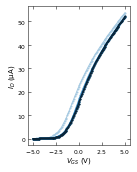

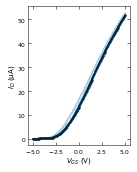

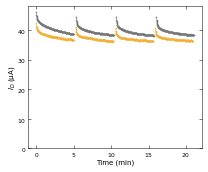

In [20]:
print(' === Figure S? === ')
color_SiNx = '#f2b134' #'#ee7539'
color_peach = '#ff8e65'
color_gray = '#777777'

# SiNx chip in air
data_air_gs   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/3-4',  'GateSweep.json',  minExperiment=84, maxExperiment=84, minRelativeIndex=0, maxRelativeIndex=float('inf'))
data_air_sb   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/3-4',  'StaticBias.json',  minExperiment=84, maxExperiment=84, minRelativeIndex=0, maxRelativeIndex=float('inf'))

# SiNx chip in vacuum probe station (5e-5 Torr)
data_vac_gs   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/3-4',  'GateSweep.json',  minExperiment=90, maxExperiment=90, minRelativeIndex=0, maxRelativeIndex=float('inf'))
data_vac_sb   = dlu.loadSpecificDeviceHistory('../../AutexysData/jay/MoS2FET/JM4/K/3-4',  'StaticBias.json',  minExperiment=90, maxExperiment=90, minRelativeIndex=0, maxRelativeIndex=float('inf'))

fig1, axes1 = dpu.makeDevicePlot('TransferCurve', data_air_gs, data_air_gs[0]['Identifiers'], mode_parameters={'publication_mode':True, 'sweepDirection':'reverse', 'figureSizeOverride':(2,2.5), 'enableColorBar':False, 'enableLegend':False, 'colorsOverride':[]})
fig2, axes2 = dpu.makeDevicePlot('TransferCurve', data_vac_gs, data_vac_gs[0]['Identifiers'], mode_parameters={'publication_mode':True, 'sweepDirection':'reverse', 'figureSizeOverride':(2,2.5), 'enableColorBar':False, 'enableLegend':False, 'colorsOverride':[]})

fig3, (ax3A,ax3B,ax3C) = dpu.makeDevicePlot('StaticBias'   , data_vac_sb, data_vac_sb[0]['Identifiers'], mode_parameters={'publication_mode':True, 'enableLegend':False, 'colorsOverride':[color_SiNx]*len(data_vac_sb), 'ylim':{'top':48}})

for deviceRun in data_air_sb:
    deviceRun['Results']['timestamps'] = np.array(deviceRun['Results']['timestamps'])/60
t0 = data_air_sb[0]['Results']['timestamps'][0]
time_offsets = [deviceRun['Results']['timestamps'][0] - t0 for deviceRun in data_air_sb]
for i in range(len(data_air_sb)):
    mplu.plotStaticBias(ax3A, data_air_sb[i], color_gray, time_offsets[i])
